## Problem Statement

#### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## Hierarchical Clustering 

### Import all the required libraries 


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [10]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
# Normalization function
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

In [12]:
# Normalized dataframe (considering the numerical part of data)
df_norm = norm_func(airlines.iloc[:,1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


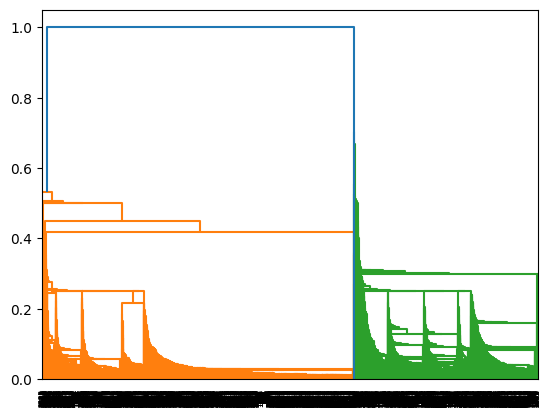

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

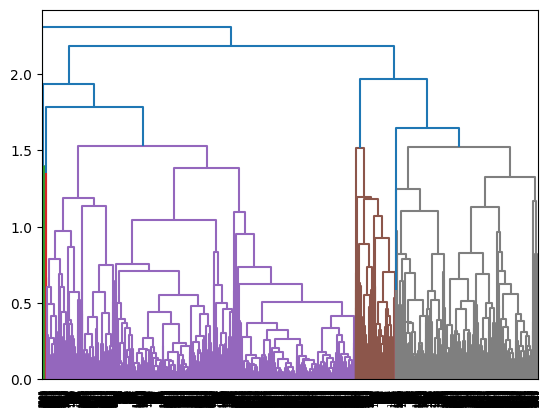

In [14]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [15]:
??AgglomerativeClustering

In [16]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [17]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [18]:
y_hc = hc.fit_predict(df_norm)

In [19]:
airlines['h_clusterid'] = y_hc

In [20]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [21]:
airlines.groupby(["h_clusterid"])["ID"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID, dtype: object

In [22]:
airlines[airlines["ID"].isin([5, 8, 9, 10, 12, 16])]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1


## KMeans Clustering 

In [23]:
model_kmeans = KMeans(n_clusters = 5)
airlines_scaled = model_kmeans.fit(df_norm)

In [24]:
model_kmeans.labels_

array([4, 4, 4, ..., 2, 3, 3])

In [25]:
md = pd.Series(model_kmeans.labels_)

In [27]:
airlines["labels"] = pd.Series(model_kmeans.labels_)

In [28]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2


In [29]:
airlines.groupby(["labels"])["ID"].apply(lambda x:tuple(x))

labels
0    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
1    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
2    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
3    (1141, 1445, 1564, 1567, 1568, 1569, 1586, 196...
4    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
Name: ID, dtype: object

In [30]:
model_kmeans.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.88578059e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 1.94103660e-02,  8.43565288e-03,  1.76669894e-02,
         8.22846079e-03,  1.69409487e-03,  1.23106384e-02,
         7.18386276e-02,  6.90024091e-03,  1.13792033e-02,
         2.40189960e-01, -4.99600361e-16],
       [ 2.92977490e-02,  8.07381776e-03,  3.05651672e-02,
         9.80392157e-03,  2.88350634e-04,  1.31422452e-02,
  

### Inferences

In [31]:
airlines.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award', 'h_clusterid', 'labels'],
      dtype='object')

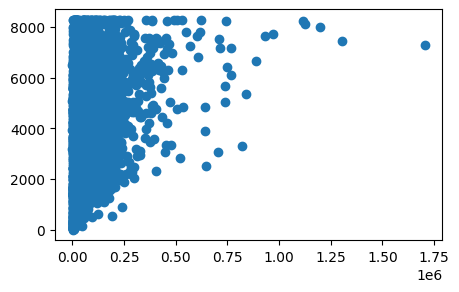

In [32]:
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],cmap=plt.cm.Accent)

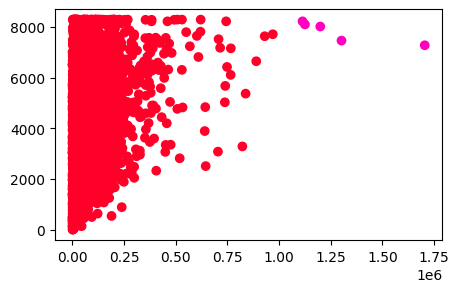

In [33]:
#using Hierarchical
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage = "complete")
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=cluster.fit_predict(airlines.iloc[:,[1,-4]]),cmap=plt.cm.gist_rainbow)

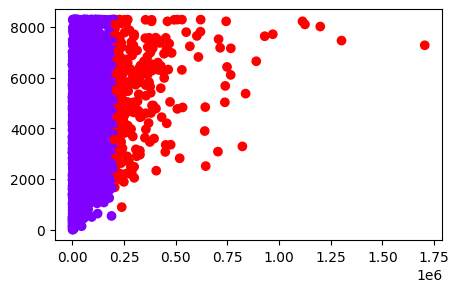

In [34]:
#using kmeans
model = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
model.fit(airlines.iloc[:,[1,-4]])
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=model.labels_,cmap=plt.cm.rainbow)

In [35]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

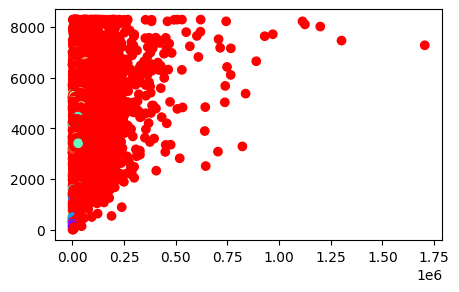

In [36]:
#DBSCAN
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(airlines.iloc[:,1:5])
plt.figure(figsize=(5,3))
plt.scatter(airlines["Balance"],airlines["Days_since_enroll"],c=class_pr,cmap=plt.cm.rainbow_r)

### Finding the optimal number of clusters

In [37]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i  in nc:
    km=KMeans(i)
    km.fit(df.iloc[:,[1,-2]])
    iner.append(km.inertia_)

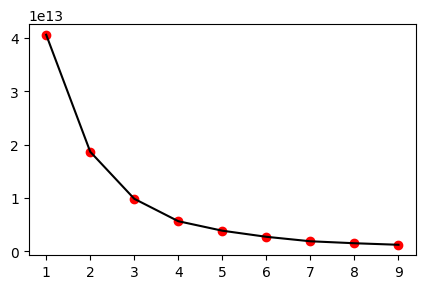

In [39]:
plt.figure(figsize=(5,3))
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

### Silhouette Score

In [40]:
from sklearn.metrics import silhouette_score as sil

In [41]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(df.iloc[:,[1,-2]])
    sc_score.append(sil(df.iloc[:,[1,-2]],y))

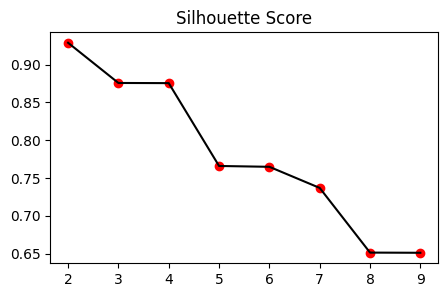

In [42]:
plt.figure(figsize=(5,3))
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.title("Silhouette Score")
plt.show()